In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
60000 train samples
10000 test samples


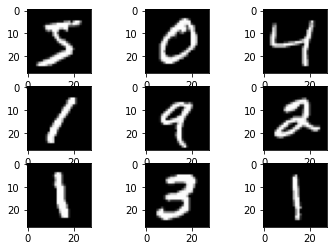

In [3]:
# Plot a sample of the dataset
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
input_size = 28 * 28

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, InputLayer, Dropout, Conv2D, MaxPooling2D

#Create a model
model=Sequential()

# Add first hidden layer
model.add(Conv2D(filters=1024, kernel_size=2, strides=1, padding="same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

# Add second hidden layer
model.add(Conv2D(2048, 2, padding="same", activation='relu'))
model.add(MaxPooling2D(2))


# Flatten and add fully connected layers
model.add(Flatten()) # convert 2D to 1D
# model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))# output layer 



In [8]:
# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 1024)      5120      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 1024)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 2048)      8390656   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 2048)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
import torch

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 176s 110ms/step - loss: 0.7007 - accuracy: 0.9528 - val_loss: 0.1561 - val_accuracy: 0.9498
Epoch 2/10
1500/1500 [==============================] - 157s 104ms/step - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0810 - val_accuracy: 0.9767
Epoch 3/10
1500/1500 [==============================] - 164s 109ms/step - loss: 0.0675 - accuracy: 0.9789 - val_loss: 0.0832 - val_accuracy: 0.9775
Epoch 4/10
1500/1500 [==============================] - 164s 109ms/step - loss: 0.0591 - accuracy: 0.9821 - val_loss: 0.0660 - val_accuracy: 0.9826
Epoch 5/10
1500/1500 [==============================] - 164s 109ms/step - loss: 0.0501 - accuracy: 0.9845 - val_loss: 0.0710 - val_accuracy: 0.9814
Epoch 6/10
1500/1500 [==============================] - 164s 109ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0795 - val_accuracy: 0.9802
Epoch 7/10
1500/1500 [==============================] - 155s 104ms/step - loss: 0.0344 - accuracy: 0.9888 - val_

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07779624313116074
Test accuracy: 0.9828000068664551


Now we try transfer learning


In [ ]:
### Using VGG
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
# load the model
model = VGG16(weights='imagenet')

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Now we remove top or fully connected layers to add our own
model = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=(32,32,3))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Freezing all the layers except fully connected layers
#Not to train the entire model
for layer in model.layers:
  layer.trainable=False

In [ ]:
# And finally adding our fully connect layers
from keras.layers import Dense, Activation, Dropout, Flatten

f = Flatten()(model.output)
x = Dense(512, activation='relu')(f)
prediction = Dense(10 ,activation='softmax')(x)

In [ ]:
# Creating the model
from keras.models import Model
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adams', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.8971 - accuracy: 0.6998 - val_loss: 1.5900 - val_accuracy: 0.5752
Epoch 2/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.8332 - accuracy: 0.7183 - val_loss: 1.6159 - val_accuracy: 0.5710
Epoch 3/10
2500/2500 [==============================] - 21s 9ms/step - loss: 0.7879 - accuracy: 0.7340 - val_loss: 1.7380 - val_accuracy: 0.5744
Epoch 4/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.7596 - accuracy: 0.7429 - val_loss: 1.8804 - val_accuracy: 0.5755
Epoch 5/10
2500/2500 [==============================] - 22s 9ms/step - loss: 0.7140 - accuracy: 0.7594 - val_loss: 1.9819 - val_accuracy: 0.5759
Epoch 6/10
2500/2500 [==============================] - 21s 9ms/step - loss: 0.6845 - accuracy: 0.7666 - val_loss: 2.0517 - val_accuracy: 0.5679
Epoch 7/10
2500/2500 [==============================] - 23s 9ms/step - loss: 0.6532 - accuracy: 0.7810 - val_loss: 2.2318 - val_a

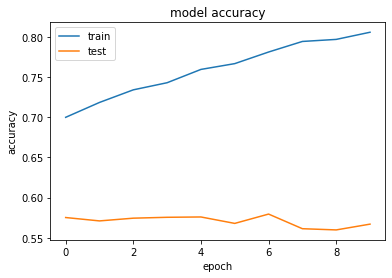

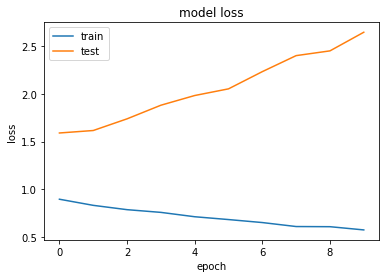

In [ ]:
#import matplotlib.pyplot as plt
from matplotlib import pyplot
# summarize history for accuracy
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()